<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

task-1

In [ ]:
# Exploratory Data Analysis on Retail Sales Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('retail_sales_dataset.csv')
print("Initial Data Overview:\n", df.head())

Initial Data Overview:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  



Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Data Types:
 Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

Shape: (1000, 9)

Descriptive Statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.0

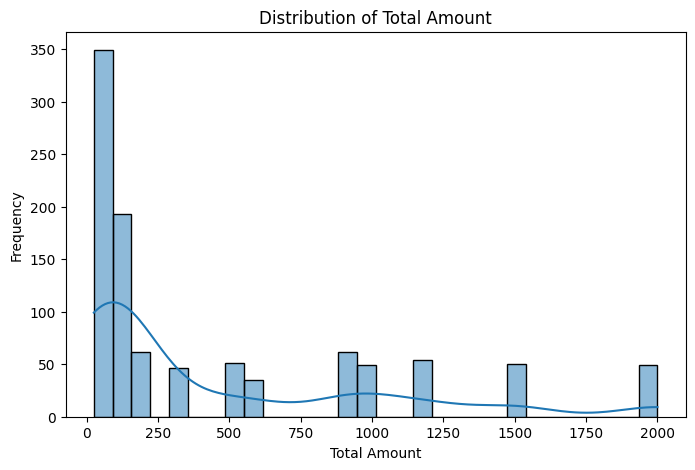

In [ ]:
# 1. Data Cleaning

print("\nMissing values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Basic info
print("\nData Types:\n", df.dtypes)
print("\nShape:", df.shape)

# 2. Descriptive Statistics

print("\nDescriptive Statistics:\n", df.describe())

# Distribution of Total Amount
plt.figure(figsize=(8,5))
sns.histplot(df['Total Amount'], kde=True, bins=30)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

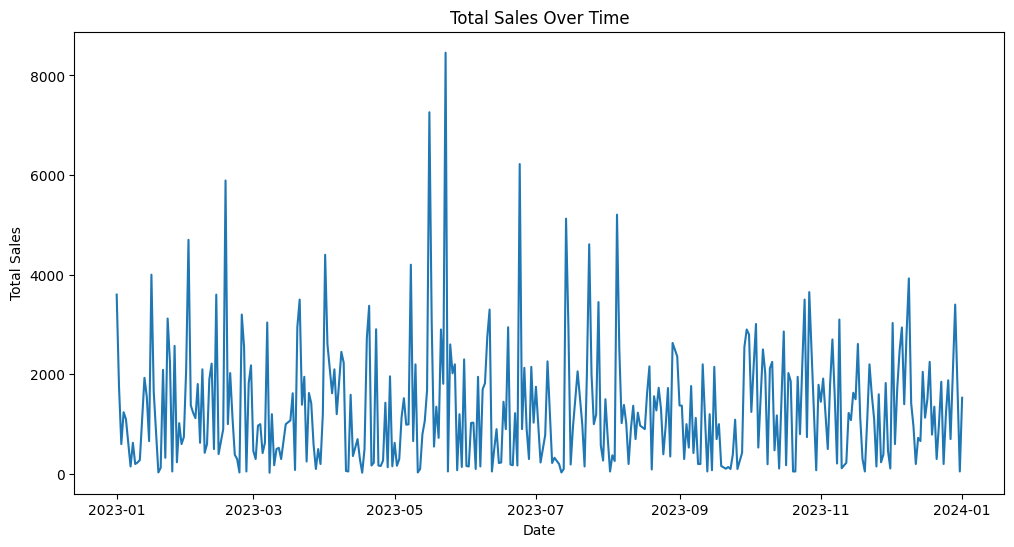

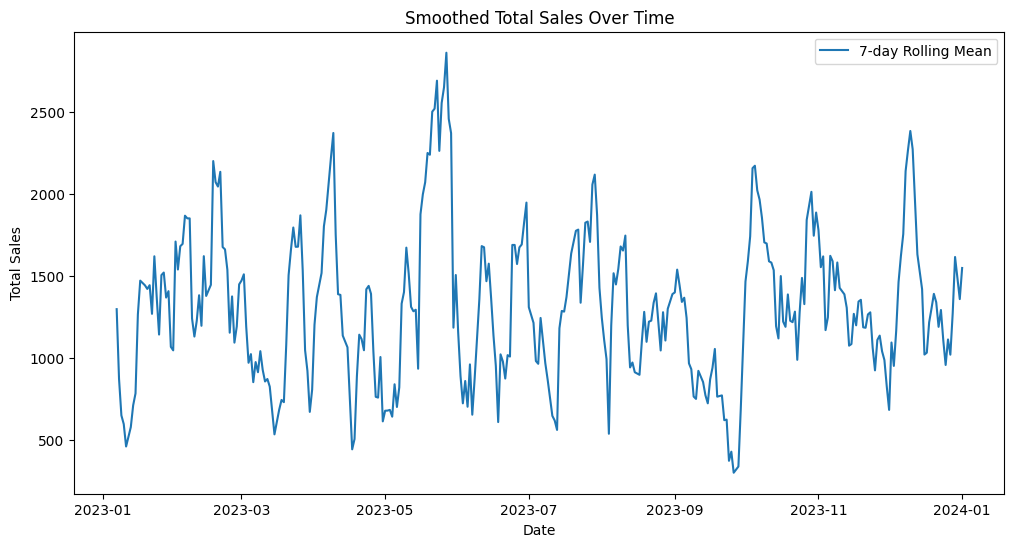

In [ ]:
# 3. Time Series Analysis

# Group by Date
time_df = df.groupby('Date')['Total Amount'].sum().reset_index()

# Plot time series
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total Amount', data=time_df)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Rolling average
time_df['Rolling_Sales'] = time_df['Total Amount'].rolling(window=7).mean()
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Rolling_Sales', data=time_df, label='7-day Rolling Mean')
plt.title('Smoothed Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

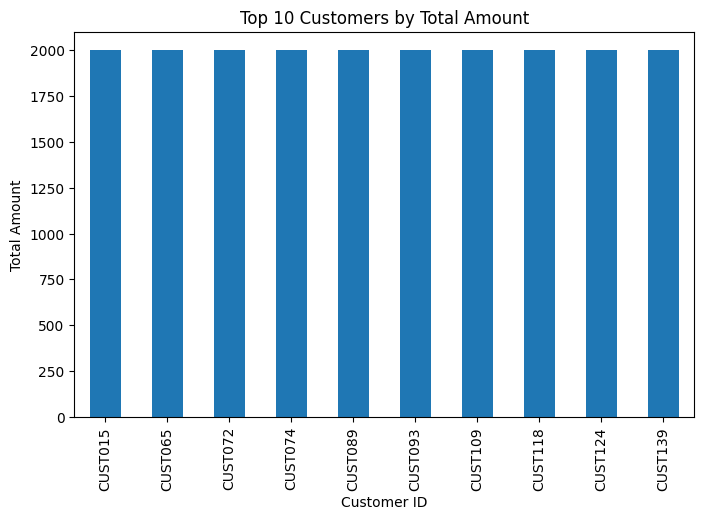

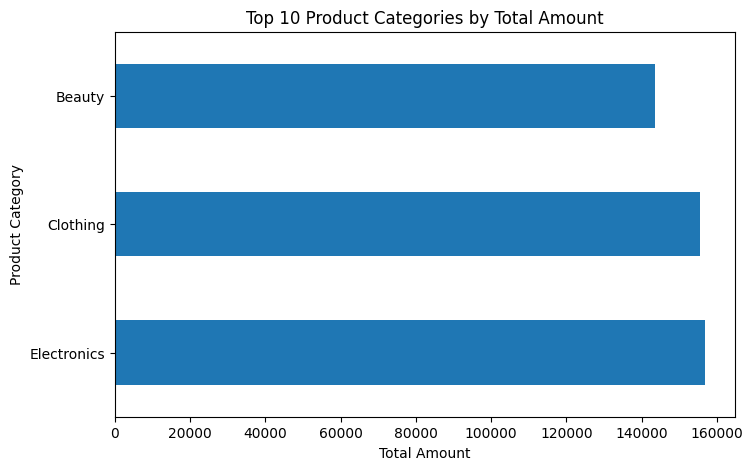


RFM Head:
              Recency  Frequency  Monetary
Customer ID                              
CUST001           38          1       150
CUST002          308          1      1000
CUST003          353          1        30
CUST004          225          1       500
CUST005          240          1       100


In [ ]:
# 4. Customer and Product Analysis

# Top 10 customers
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(8,5), title='Top 10 Customers by Total Amount')
plt.ylabel('Total Amount')
plt.xlabel('Customer ID')
plt.show()

# Top selling product categories
top_products = df.groupby('Product Category')['Total Amount'].sum().nlargest(10)
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Product Categories by Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.show()

# RFM (Recency, Frequency, Monetary) analysis
snapshot_date = df['Date'].max()
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'Transaction ID': 'count',
    'Total Amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("\nRFM Head:\n", rfm.head())

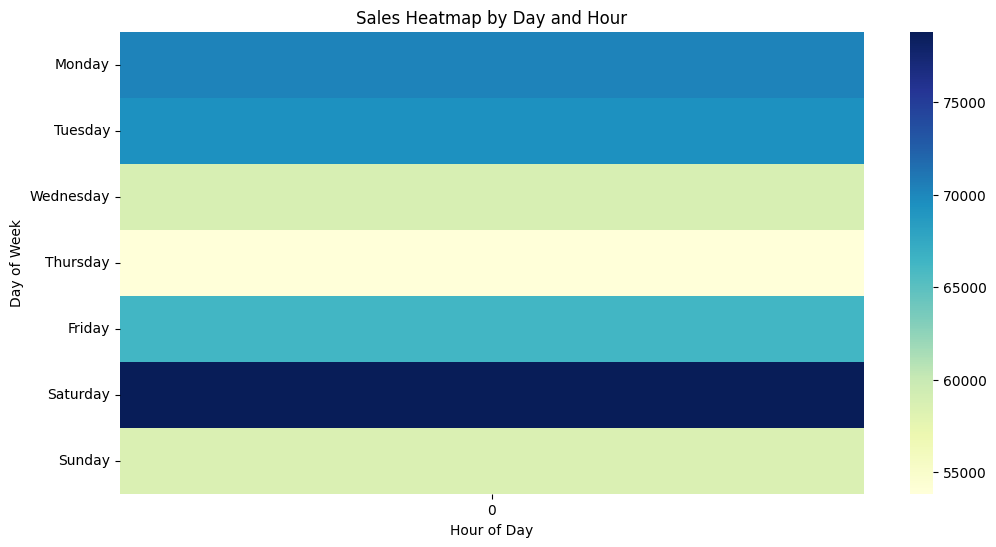


Recommendations:
- Focus on top-selling product categories for promotions and inventory planning.
- Reward frequent and high-spending customers with loyalty programs.
- Prepare for high sales periods based on time series trends.
- Optimize marketing for days and hours with peak sales.


In [ ]:
# 5. Heatmap - Sales by Day and Hour

# Create features
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Pivot table
heatmap_data = df.pivot_table(index='Day', columns='Hour', values='Total Amount', aggfunc='sum')
# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# 6. Sample Recommendations

print("\nRecommendations:")
print("- Focus on top-selling product categories for promotions and inventory planning.")
print("- Reward frequent and high-spending customers with loyalty programs.")
print("- Prepare for high sales periods based on time series trends.")
print("- Optimize marketing for days and hours with peak sales.")